In [ ]:
# CANB8347, Hossein Jashnsaz, ODEs, Feb21 and Feb23, spring 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp, odeint
plt.style.use('seaborn-poster')

([<matplotlib.axis.XTick at 0x7f77ca7cf850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

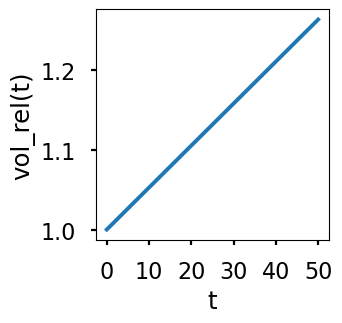

In [2]:
"""
EXAMPLE 1: 
Linear growth of cell volume over time, V(t)
"""
#variables: t, time; vol, cell volume over time; dv/dt=a
dvoldt = lambda t, vol: a
a=(1.2-1)/38 # parameter estimated for yeast (S. cerevisiae) cells growth in CSM growth media, OD600 measurments
t = np.arange(0, 50, 0.01) #time points 
IC = [1] # Initial condition, value of our function, y(t) at t=0, y(t=0)
sol = solve_ivp(dvoldt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) #  solve ODE 
# RK45 Runge-Kutta method of order 5(4)

plt.figure(figsize = (3,3))
plt.subplot(111)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('vol_rel(t)')
plt.xticks(np.arange(np.min(t),np.max(t)+1, step=10))

([<matplotlib.axis.XTick at 0x7f77ca9a7c70>,
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150')])

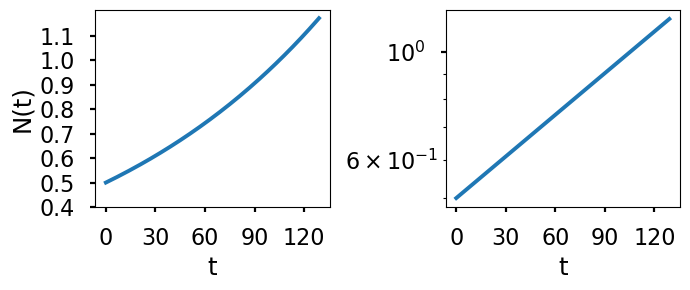

In [3]:
"""
EXAMPLE 2: 
Exponential growth of a population of cells, N(t)
"""

#variables: t, time; N, nuumber of cells over time; dN/dt=aN
dNdt = lambda t, N: a*N 

a=np.log(2)/105 # parameter estimated for yeast (S. cerevisiae) cells growth in CSM growth media, OD600 measurments
t = np.arange(0, 130, 1) #time points 
IC = [.5] # Initial condition, value of our function, N(t) at t=0, N(t=0)
sol = solve_ivp(dNdt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODE

plt.figure(figsize = (7,3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')
plt.xticks(np.arange(np.min(t),np.max(t),step=30))
plt.yticks(np.arange(.4,1.2,step=.1))

plt.subplot(122)
plt.semilogy(sol.t, sol.y[0])
plt.xlabel('t')
#plt.ylabel('N(t)')
plt.tight_layout()
plt.xticks(np.arange(np.min(t),np.max(t),step=30))

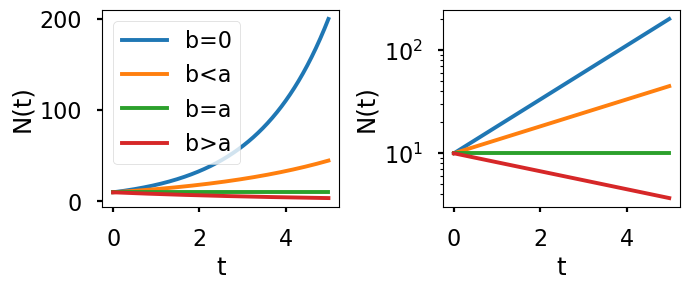

In [4]:
"""
Project 1: 
solve the growth function over time, N(t), for a population of cells with growth rate a 
and cell death rate of a that is proportional to the total number of cells. 
Plot N(t) for different ranges of parameters: a>b,  a=b, a<b. Compare each of this to the plot for b=0. 
Define effective growth rate:  r=a−b and calculate doubling time in terms of r and compare to that from a.  
"""

#variables: t, time; N, nuumber of cells over time; dN/dt=aN-bN=(a-b)N
dNdt = lambda t, N: a*N-b*N 

#without cell death
a=.6 # parameter1, growth rate
b=0 # parameter2, death rate
t = np.arange(0, 5, 0.01) #time points
IC = [10] # Initial condition, value of ouur function, y(t) at t=0, y(t=0)
sol0 = solve_ivp(dNdt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODE

#with cell death 1
b=0.3 # parameter2, death rate
sol1 = solve_ivp(dNdt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODE

#with cell death 2
b=.6 # parameter2, death rate
sol2 = solve_ivp(dNdt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODE

#with cell death 3
b=.8 # parameter2, death rate
sol3 = solve_ivp(dNdt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODE

plt.figure(figsize = (7, 3))
plt.subplot(121)
plt.plot(sol0.t, sol0.y[0])
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.plot(sol3.t, sol3.y[0])
plt.legend(['b=0','b<a','b=a','b>a'])

plt.xlabel('t')
plt.ylabel('N(t)')

plt.subplot(122)
plt.semilogy(sol0.t, sol0.y[0])
plt.semilogy(sol1.t, sol1.y[0])
plt.semilogy(sol2.t, sol2.y[0])
plt.semilogy(sol3.t, sol3.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')
plt.tight_layout()

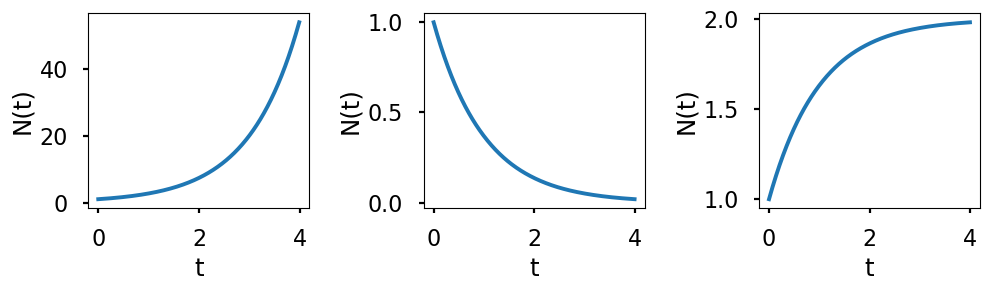

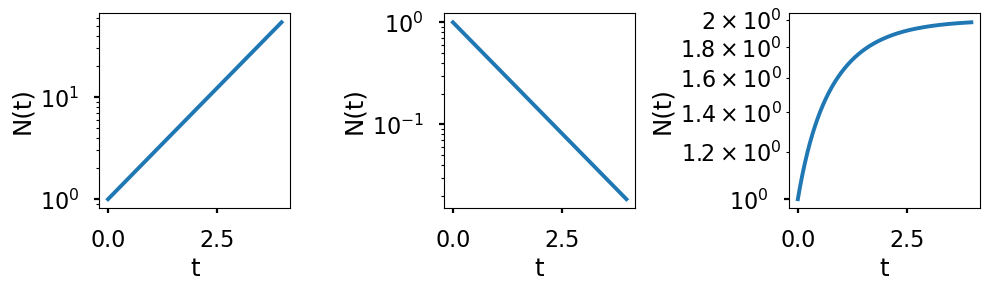

In [5]:
"""""
3 common cases: Exponential growth, decay, and saturation 
"""""

#variables: t, time; N, s = {N1,N2,N3}
ODEs = lambda t, s: [a*s[0], -a*s[1], 2-a*s[2]] #variables: t, time; s={s1(t),s2(t),s3(t)}; [ds1/dt=as1, ds2/dt=-as, ds3/dt=2-as3]

a=1 # parameter
t = np.arange(0, 4, 0.01) #time points
IC = [1, 1, 1] # Initial condition, value of ouur function, y(t) at t=0, y(t=0)
sol = solve_ivp(ODEs, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODEs

plt.figure(figsize = (10,3))
plt.subplot(131)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.subplot(132)
plt.plot(sol.t, sol.y[1])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.subplot(133)
plt.plot(sol.t, sol.y[2])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.tight_layout()
plt.show()

# set y-axis to log scale
plt.figure(figsize = (10,3))
plt.subplot(131)
plt.semilogy(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.subplot(132)
plt.semilogy(sol.t, sol.y[1])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.subplot(133)
plt.semilogy(sol.t, sol.y[2])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.tight_layout()
plt.show()

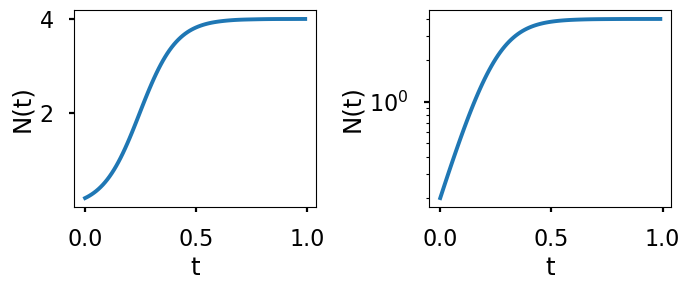

In [6]:
"""
EXAMPLE 4: 
Logistic function: S-curve growth of a population of cells that eventually saturate 
because of competition between cells at high numbers for food, space, etc, N(t)
parameters a, b
"""

dNdt = lambda t, N: a*N-b*N**2 #variables: t, time; N, nuumber of cells over time

a=12 # parameter1
b=3 # parameter2
t = np.arange(0, 1, 0.01) #time points
IC = [.2] # Initial condition, value of our function, y(t) at t=-1, y(t=-1)
sol = solve_ivp(dNdt, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODE

plt.figure(figsize = (7,3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')

plt.subplot(122)
plt.semilogy(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')
plt.tight_layout()

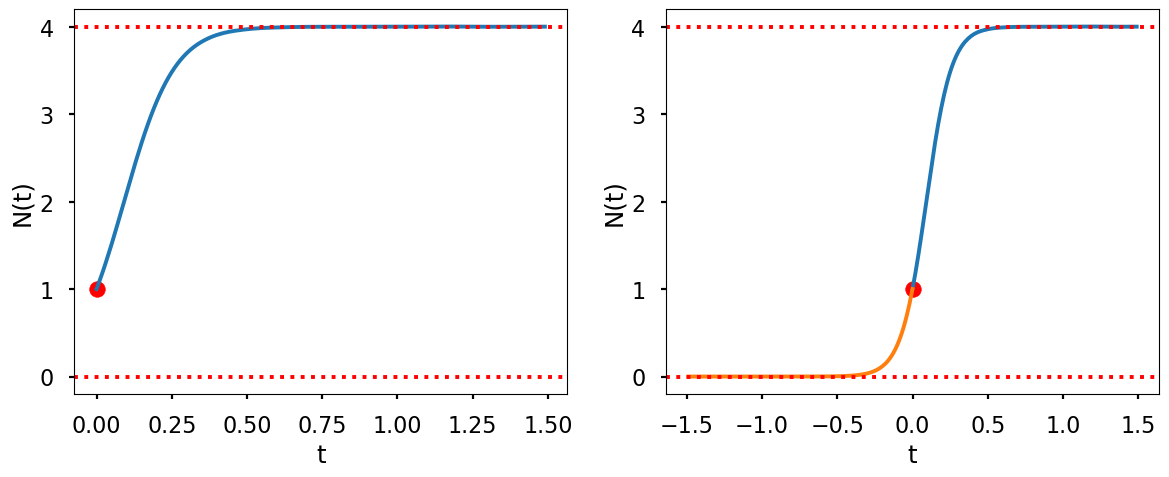

In [7]:
"""
EXAMPLE 4: 
Logistic function: S-curve growth of a population of cells that eventually saturate 
because of competition between cells at high numbers for food, space, etc, N(t)
parameters r, K
"""

dNdt = lambda t, N: r*(1/K)*(K-N)*N #variables: t, time; N, nuumber of cells over time

# r and K values are set from a and b values from tthe previous box
r=a # parameter1
K=a/b # parameter2
IC = [1] # Initial condition, value of our function, y(t) at t=0, y(t=0)

# solve the model for the positive times points
t1 = np.arange(0, 1.5, 0.01) #time points
sol1 = solve_ivp(dNdt, [np.min(t1),np.max(t1)], IC, method = 'RK45', t_eval=t1) # solve ODE

plt.figure(figsize = (14,5))
plt.subplot(121)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')
# plot horizontal lines for steady states
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.axhline(y=K, color = 'r', linestyle = ':')
plt.scatter(0,IC,color = 'r')

# solve the model for the nagative time points
t2 = np.arange(0, -1.5, -0.01) #time points
sol2 = solve_ivp(dNdt, [np.max(t2),np.min(t2)], IC, method = 'RK45', t_eval=t2) # solve ODE

plt.subplot(122)
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.ylabel('N(t)')
# specifying horizontal lines
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.axhline(y=K, color = 'r', linestyle = ':')
plt.scatter(0,IC,color = 'r')

y*(12.0 - 3.0*y)

12.0 - 6.0*y

-6.00000000000000

[0. 4.]
[2.]


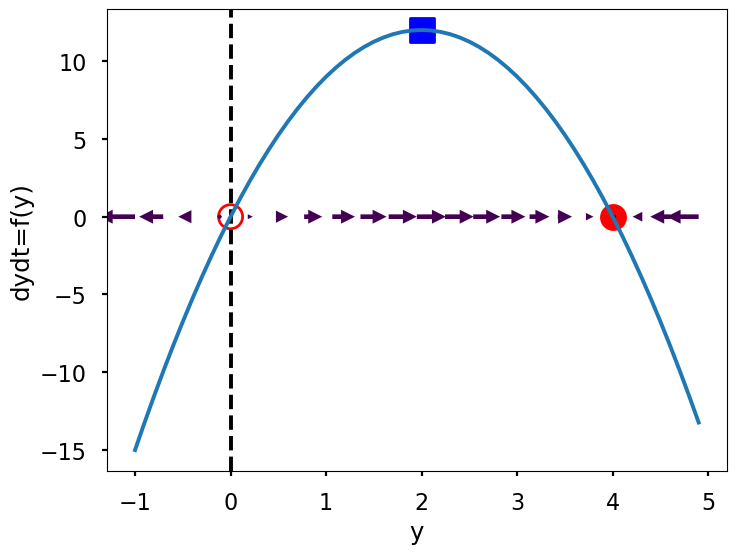

In [16]:
"""
EXAMPLE 4: 
Logistic function: S-curve growth of a population of cells that eventually saturate 
because of competition between cells at high numbers for food, space, etc, N(t)
dydt vs y plots, 
fixed points, 
stability, 
vector field, 
"""

# define ODE (dydt versus y)
# def dydt(y): #variables: y, dynamic variable over time, y(t)
#     return r*(1/K)*(K-y)*y

# def dfdy(y): 
#     return r*(1/K)*(K-2*y)


# defining ODEs using symbolic so we can take deraviative of dydt wrt y in the code
from sympy import *
y = symbols('y') # define y as a symbolic variable
dydt = r*(1/K)*(K-y)*y # dydt = f(y)
display(dydt)

# take the 1st derivative of f(y) wrt y: f'(y)
dfdy = dydt.diff(y)
display(dfdy)

# take the 2nd derivative of f(y) wrt y: f''(y)
df2dy = dfdy.diff(y)
display(df2dy)

# convert back to python function
dydt = lambdify(y,dydt)
dfdy = lambdify(y,dfdy)
df2dy = lambdify(y,df2dy)

r=12 # parameter1
K=4 # parameter2

y = np.arange(-1, +5, 0.1) #y values
f = dydt(y) # dydt values at y values

# plot the dydt vs y
plt.figure(figsize = (8,6))
# plt.axhline(y=0, color = 'k', linestyle = '--') # specify y=0 horizontal line 
plt.axvline(x=0, color = 'k', linestyle = '--') # specify x=0 vertical line
plt.plot(y,f)
plt.xlabel('y')
plt.ylabel('dydt=f(y)')
# plt.show()

# specify the roots of dy/dt=f(y)=0 (y for which dydt = 0)
# roots = [0,K]

# find the roots for f(y); provide guess; as many as the number of roots 
from scipy.optimize import fsolve
guess = np.arange(np.min(y),np.max(y), .4) # use many guesses at the range of y, then keep unique of roots, to find all roots. This method finds one root for one guess.
roots = fsolve(dydt,guess)
roots=np.unique(roots.round(4))
print(roots.round(4))

# plot the fixed points as vertical lines
# for i in range(len(roots)):
#     plt.axvline(x=roots[i], color = 'r', linestyle = ':') # plot y=0 vertical lines
# plt.show()

# plot the fixed points
for i in range(len(roots)):
    if dfdy(roots[i])>0: #unstable
        plt.scatter(roots[i],0,300,facecolors='none', edgecolors='r',linewidths=2)
    elif dfdy(roots[i])<0: #stable
        plt.scatter(roots[i],0,300,color='r',linewidths=2)
    else: 
        print('further analysis is needed.')   
# plt.show()
        
# calculate and plot the vector fields
Y = np.linspace(np.min(y),np.max(y),21) #20 y values
d = (np.max(y)-np.min(y))/21 # steps in y
DY = dydt(Y) # dydt values at 20 y values
DY = DY/abs(np.max(DY)) # normalized
DY = d*DY
YY=np.concatenate((Y,Y+DY),axis=None)
YY=np.sort(YY)
color=0*DY
plt.quiver(Y,0,DY,0,color,scale=6,headlength=3,headaxislength=3) # color, width=5e-3
# plt.show()

# find the maximas of f(y); find the roots of f'(y)=df/dy
guess = np.arange(np.min(y),np.max(y), .4) # use many guesses at the range of y, then keep unique of roots, to find all roots. This method finds one root per guess.
maxsmins = fsolve(dfdy,guess)
maxsmins=np.unique(maxsmins.round(4))
print(maxsmins.round(4))

# plot the max/min 
for i in range(len(maxsmins)):
    if df2dy(maxsmins[i])>0: #min growth rate
        plt.scatter(maxsmins[i],dydt(maxsmins[i]),300,marker='s',facecolors='none', edgecolors='b',linewidths=2)
    elif df2dy(maxsmins[i])<0: #max growth rate
        plt.scatter(maxsmins[i],dydt(maxsmins[i]),300,marker='s',color='b',linewidths=2)
    else: 
        print('further analysis is needed.')   
plt.show()

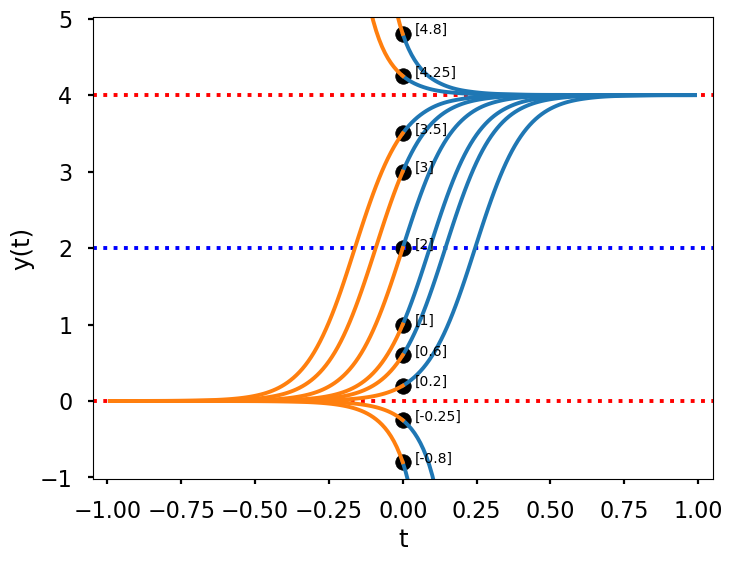

In [9]:
"""
EXAMPLE 4: 
Logistic function: S-curve growth of a population of cells that eventually saturate 
because of competition between cells at high numbers for food, space, etc, N(t)
Solution, N(t), with multiple initial conditions (IC)
"""

dNdt = lambda t, N: r*(1/K)*(K-N)*N #variables: t, time; N, nuumber of cells over time

r=12 # parameter1
K=4 # parameter2
t1 = np.arange(0, 1, 0.01) #time points, positive
t2 = np.arange(0, -1, -0.01) #time points
plt.figure(figsize = (8,6))
# plt.subplot(122)
# specifying horizontal lines

# plot the fixed points as horizontal lines (steady states)
for i in range(len(roots)):
    plt.axhline(y=roots[i], color = 'r', linestyle = ':') # plot ss horizontal line 
for i in range(len(maxsmins)):
    plt.axhline(y=maxsmins[i], color = 'b', linestyle = ':') # plot max rate change horizontal line 

multi_IC = (-.8,-.25,.2,.6,1,2,3,3.5,4.25,4.8) # multiple initial conditions
for i in multi_IC:
    IC = [i] # Initial condition, value of our function, y(t) at t=0, y(t=0)
#     plt.plot(t, N*np.sin(t), c=C0N, ls='-',  label='c='+C0N) 
    # solve the model for the positive time points using IC at t=0 (forward in t)
    sol1 = solve_ivp(dNdt, [np.min(t1),np.max(t1)], IC, method = 'RK45', t_eval=t1) # solve ODE
    # solve the model for the nagative time points using IC at t=0 (backward in t)
    sol2 = solve_ivp(dNdt, [np.max(t2),np.min(t2)], IC, method = 'RK45', t_eval=t2) # solve ODE

    C0, C1 = 'C%d'%(0), 'C%d'%(1) 
    plt.plot(sol1.t, sol1.y[0],c=C0)
    plt.plot(sol2.t, sol2.y[0],c=C1)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.xlim(-1.05,1.05)
    plt.ylim(-1.02,5.02)

    plt.scatter(0,IC,color = 'k') # plot IC
    plt.text(.04,i,str(IC))

In [10]:
# function to plot vector fields for a system of ODEs
# reference: https://gist.github.com/nicoguaro/6767643 
import numpy as np
from matplotlib import pyplot as plt

def vector_field_XY(f, xran=[-5, 5], yran=[-5, 5], grid=[21, 21], color='k'):
    """
    Plot the direction field for an ODE written in the form 
        x' = F(x,y)
        y' = G(x,y)
    
    The functions F,G are defined in the list of strings f.
    
    Input
    -----
    f:    list of strings ["F(X,Y)", "G(X,Y)"
          F,G are functions of X and Y (capitals).
    xran: list [xmin, xmax] (optional)
    yran: list [ymin, ymax] (optional)
    grid: list [npoints_x, npoints_y] (optional)
          Defines the number of points in the x-y grid.
    color: string (optional)
          Color for the vector field (as color defined in matplotlib)
    """
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    def dX_dt(X, Y, t=0): return map(eval, f)
    
    X , Y  = np.meshgrid(x, y)  # create a grid
    DX, DY = dX_dt(X, Y)        # compute growth rate on the grid
    M = (np.hypot(DX, DY))      # Norm of the growth rate 
    M[ M == 0] = 1.             # Avoid zero division errors 
    DX = DX/M                   # Normalize each arrows
    DY = DY/M  
      
    plt.quiver(X, Y, DX, DY, pivot='mid', color=color)
    plt.xlim(xran), plt.ylim(yran)
    plt.grid('on')    
    
# ## Example
# # Lotka-Volterra Equation
# lotka = ["X - X*Y", "X*Y - Y"]
# plt.figure()
# vector_field_XY(lotka, xran=[0, 5], yran=[0, 5])
# plt.show()

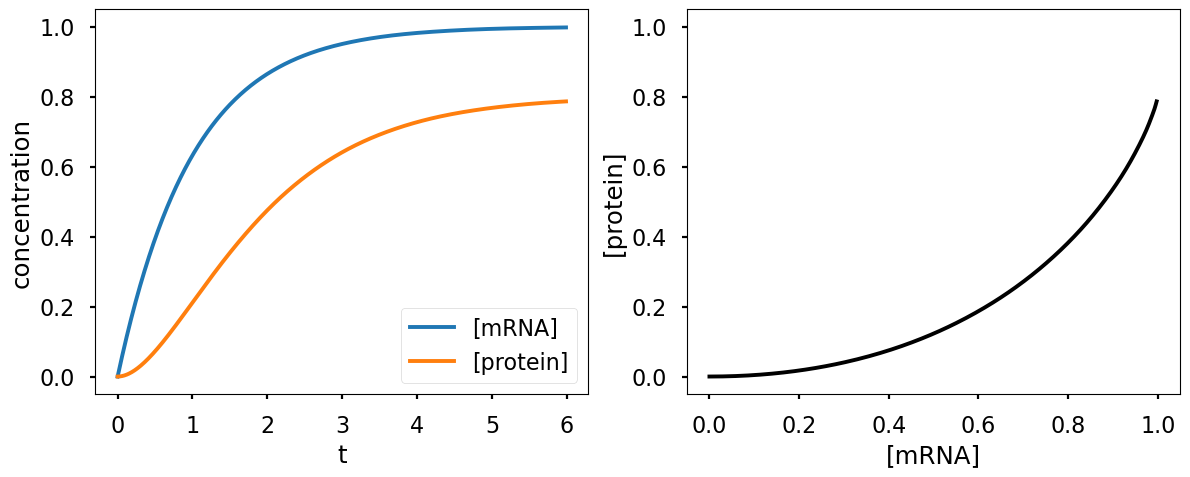

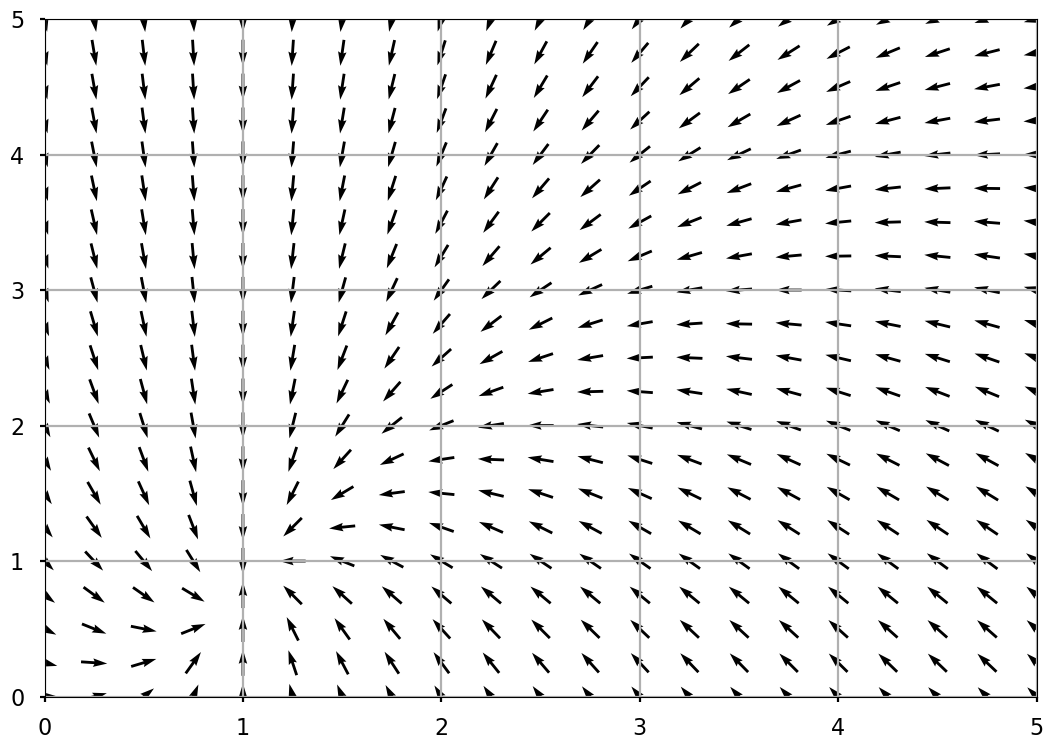

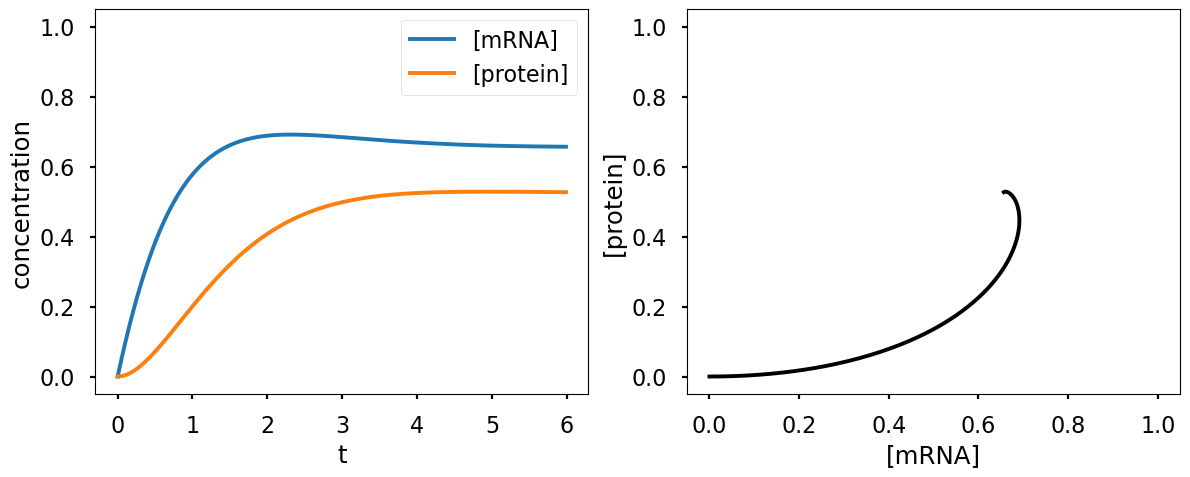

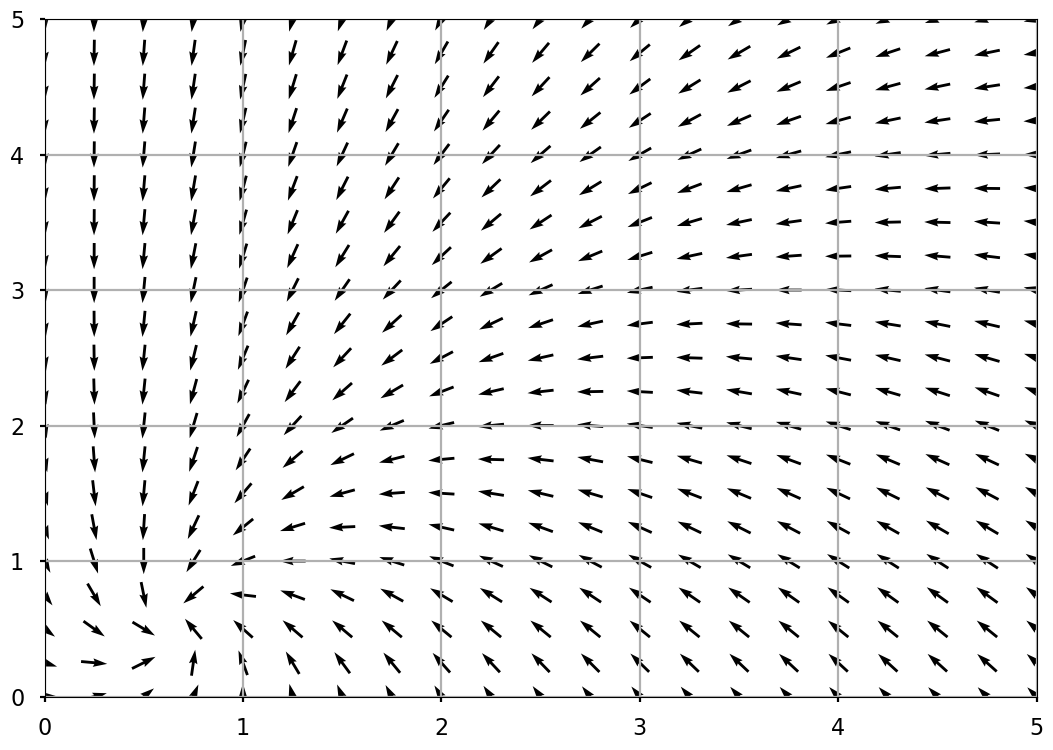

Text(0, 0.5, '[protein]')

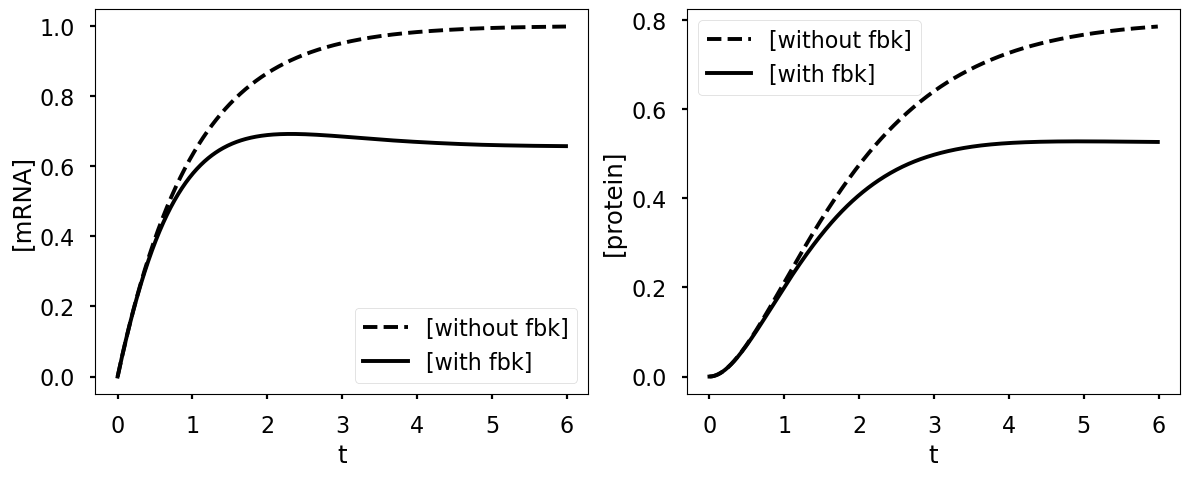

In [11]:
"""
EXAMPLE 5: 
and project 4: 
Modeling transcription of mRNA and translation of protein
following the activation of a gene using a systems of coupled ODEs. 

Without feedback regulation
#d[mRNA]/𝑑𝑡 = 𝑘_𝑡𝑟𝑠 − 𝑘_𝑚𝑙𝑜𝑠𝑠∗[𝑚𝑅𝑁𝐴]
#d[protein]/𝑑𝑡 = 𝑘_𝑡𝑟𝑙∗[𝑚𝑅𝑁𝐴] − 𝑘_𝑝𝑙𝑜𝑠𝑠∗[𝑝𝑟𝑜𝑡𝑒𝑖𝑛]

Wit feedback regulation
#d[mRNA]/𝑑𝑡 = 𝑘_𝑡𝑟𝑠/(1+[𝑝𝑟𝑜𝑡𝑒𝑖𝑛]/K) − 𝑘_𝑚𝑙𝑜𝑠𝑠∗[𝑚𝑅𝑁𝐴]
#d[protein]/𝑑𝑡 = 𝑘_𝑡𝑟𝑙∗[𝑚𝑅𝑁𝐴] − 𝑘_𝑝𝑙𝑜𝑠𝑠∗[𝑝𝑟𝑜𝑡𝑒𝑖𝑛]

"""

#variables: t, time; s = {[mRNA], [protein]}
mRNA_protein = lambda t, s: [k_trs - k_mloss*s[0], k_trl*s[0] - k_ploss*s[1]] # ODEs without feedback
mRNA_protein_fbk = lambda t, s: [k_trs/(1+s[1]/K) - k_mloss*s[0], k_trl*s[0] - k_ploss*s[1]] # ODEs with feedback


k_trs=1 # parameter1: mRNA trascription rate
k_mloss=1 # parameter2: mRNA loss rate
k_trl=.8 # parameter3: protein translation rate
k_ploss=1 # parameter4: protein loss rate
K=1 # parameter5: protein inhibiting mRNA transcription, K

t = np.arange(0, 6, 0.01) #time points
IC = [0,0] # Initial condition, value of ouur function, y(t) at t=0, y(t=0)
sol1 = solve_ivp(mRNA_protein, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODEs without feedback
sol2 = solve_ivp(mRNA_protein_fbk, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODEs with feedback

# without feedback
plt.figure(figsize = (14,5))
plt.subplot(121)
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol1.t, sol1.y[1])
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend(['[mRNA]', '[protein]'])
plt.ylim(-.05,1.05)
# plt.show()

plt.subplot(122)
plt.plot(sol1.y[0], sol1.y[1],'k')
plt.xlabel('[mRNA]')
plt.ylabel('[protein]')
# plt.legend(['[mRNA]', '[protein]'])
plt.xlim(-.05,1.05)
plt.ylim(-.05,1.05)
plt.show()

plt.figure() # vector field
mRNA_protein=["1 - 1*X", "0.8*X - 1*Y"] # write the ODEs in X, Y
vector_field_XY(mRNA_protein, xran=[0, 5], yran=[0, 5])
plt.show()

# with feedback
plt.figure(figsize = (14,5))
plt.subplot(121)
plt.plot(sol2.t, sol2.y[0])
plt.plot(sol2.t, sol2.y[1])
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend(['[mRNA]', '[protein]'])
plt.ylim(-.05,1.05)
# plt.show()

plt.subplot(122)
plt.plot(sol2.y[0], sol2.y[1],'k')
plt.xlabel('[mRNA]')
plt.ylabel('[protein]')
# plt.legend(['[mRNA]', '[protein]'])
plt.xlim(-.05,1.05)
plt.ylim(-.05,1.05)
plt.show()

plt.figure() # vector field
mRNA_protein=["1/(1+Y) - 1*X", "0.8*X - 1*Y"] # write the ODEs in X, Y
vector_field_XY(mRNA_protein, xran=[0, 5], yran=[0, 5])
plt.show()

# with and without feedback
plt.figure(figsize = (14,5))
plt.subplot(121)
plt.plot(sol1.t, sol1.y[0],'--k')
plt.plot(sol2.t, sol2.y[0],'k')
plt.legend(['[without fbk]', '[with fbk]'])
plt.xlabel('t')
plt.ylabel('[mRNA]')

plt.subplot(122)
plt.plot(sol1.t, sol1.y[1],'--k')
plt.plot(sol2.t, sol2.y[1],'k')
plt.legend(['[without fbk]', '[with fbk]'])
plt.xlabel('t')
plt.ylabel('[protein]')


-y**3 + y

1 - 3*y**2

-6*y

[-1. -0.  1.]
[-0.5774  0.5774]


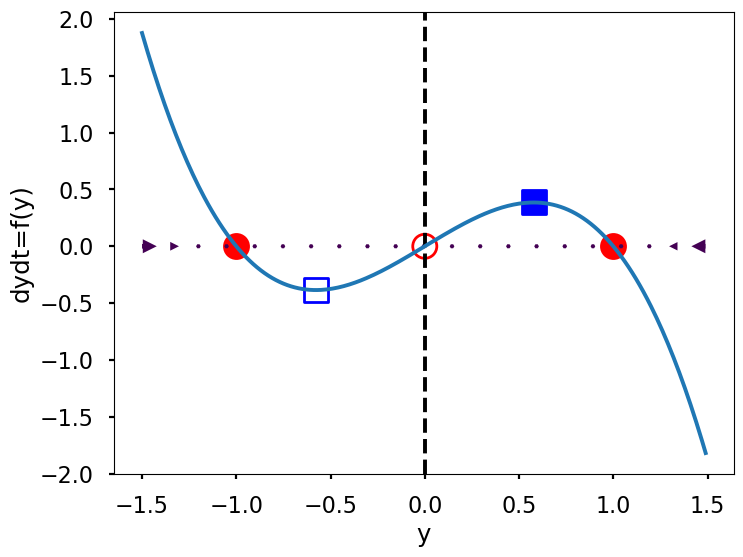

In [18]:
"""
Project 3: 
dy/dt = y-y^3
dydt vs y plots, 
fixed points, 
stability, 
vector field
"""

# define ODE (dydt versus y)
# def dydt(y): #variables: y, dynamic variable over time, y(t)
#     return r*(1/K)*(K-y)*y

# def dfdy(y): 
#     return r*(1/K)*(K-2*y)


# defining ODEs using symbolic so we can take deraviative of dydt wrt y in the code
from sympy import *
y = symbols('y') # define y as a symbolic variable
dydt = a*y-b*y**3 # dydt = f(y)
display(dydt)

# take the 1st derivative of f(y) wrt y: f'(y)
dfdy = dydt.diff(y)
display(dfdy)

# take the 2nd derivative of f(y) wrt y: f''(y)
df2dy = dfdy.diff(y)
display(df2dy)

# convert back to python function
dydt = lambdify(y,dydt)
dfdy = lambdify(y,dfdy)
df2dy = lambdify(y,df2dy)

a=1 # parameter1
b=1 # parameter2

y = np.arange(-1.5, +1.5, 0.01) #y values
f = dydt(y) # dydt values at y values

# plot the dydt vs y
plt.figure(figsize = (8,6))
# plt.axhline(y=0, color = 'k', linestyle = '--') # specify y=0 horizontal line 
plt.axvline(x=0, color = 'k', linestyle = '--') # specify x=0 vertical line
plt.plot(y,f)
plt.xlabel('y')
plt.ylabel('dydt=f(y)')
# plt.show()

# specify the roots of dy/dt=f(y)=0 (y for which dydt = 0)
# roots = [0,K]

# find the roots for f(y);
from scipy.optimize import fsolve
guess = np.arange(np.min(y),np.max(y), .4) # use many guesses, then keep unique of roots, to find all roots. This method finds one root per guess.
roots = fsolve(dydt,guess)
roots=np.unique(roots.round(4))
print(roots.round(4))

# plot the fixed points as vertical lines
# for i in range(len(roots)):
#     plt.axvline(x=roots[i], color = 'r', linestyle = ':') # plot y=0 vertical lines
# plt.show()

# plot the fixed points
for i in range(len(roots)):
    if dfdy(roots[i])>0: #unstable
        plt.scatter(roots[i],0,300,facecolors='none', edgecolors='r',linewidths=2)
    elif dfdy(roots[i])<0: #stable
        plt.scatter(roots[i],0,300,color='r',linewidths=2)
    else: 
        print('further analysis is needed.')   
# plt.show()
        
# calculate and plot the vector fields
Y = np.linspace(np.min(y),np.max(y),21) #20 y values
d = (np.max(y)-np.min(y))/21 # steps in y
DY = dydt(Y) # dydt values at 20 y values
DY = DY/abs(np.max(DY)) # normalized
DY = d*DY
YY=np.concatenate((Y,Y+DY),axis=None)
YY=np.sort(YY)
color=0*DY
plt.quiver(Y,0,DY,0,color,scale=6,headlength=3,headaxislength=3) # color, width=5e-3
# plt.show()

# find the maximas of f(y); find the roots of f'(y)=df/dy
guess = np.arange(np.min(y),np.max(y), .4) # use many guesses at the range of y, then keep unique of roots, to find all roots. This method finds one root per guess.
maxsmins = fsolve(dfdy,guess)
maxsmins=np.unique(maxsmins.round(4))
print(maxsmins.round(4))

# plot the max/min 
for i in range(len(maxsmins)):
    if df2dy(maxsmins[i])>0: #min growth rate
        plt.scatter(maxsmins[i],dydt(maxsmins[i]),300,marker='s',facecolors='none', edgecolors='b',linewidths=2)
    elif df2dy(maxsmins[i])<0: #max growth rate
        plt.scatter(maxsmins[i],dydt(maxsmins[i]),300,marker='s',color='b',linewidths=2)
    else: 
        print('further analysis is needed.')   
plt.show()

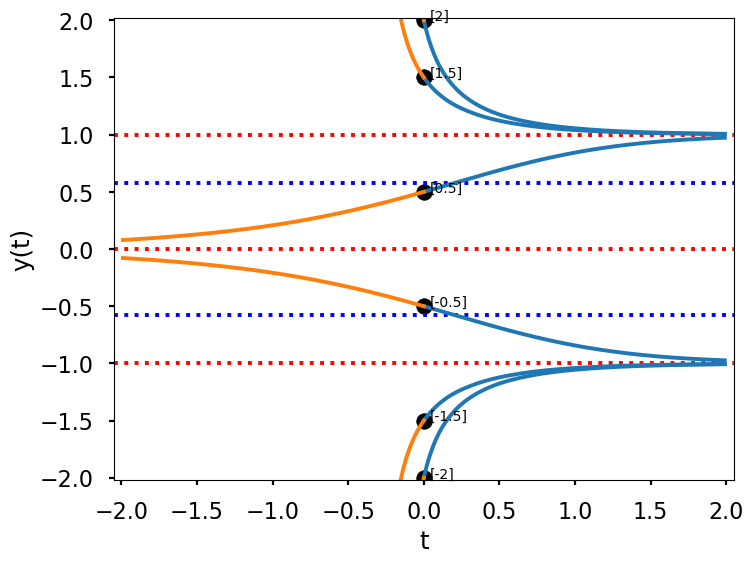

In [19]:
"""
Project 3: 
dy/dt = y-y^3
Solution, y(t), with multiple initial conditions (IC)
"""

dNdt = lambda t, N: a*N-b*N**3 #variables: t, time; N, number of cells over time

a=1 # parameter1
b=1 # parameter2
t1 = np.arange(0, 2, 0.01) #time points, positive
t2 = np.arange(0, -2, -0.01) #time points
plt.figure(figsize = (8,6))
# plt.subplot(122)
# specifying horizontal lines

# plot the fixed points as horizontal lines (steady states)
for i in range(len(roots)):
    plt.axhline(y=roots[i], color = 'r', linestyle = ':') # plot ss horizontal line 
for i in range(len(maxsmins)):
    plt.axhline(y=maxsmins[i], color = 'b', linestyle = ':') # plot max rate change horizontal line 

multi_IC = (-2, -1.5, -.5, .5, 1.5, 2) # multiple initial conditions
for i in multi_IC:
    IC = [i] # Initial condition, value of our function, y(t) at t=0, y(t=0)
#     plt.plot(t, N*np.sin(t), c=C0N, ls='-',  label='c='+C0N) 
    # solve the model for the positive time points using IC at t=0 (forward in t)
    sol1 = solve_ivp(dNdt, [np.min(t1),np.max(t1)], IC, method = 'RK45', t_eval=t1) # solve ODE
    # solve the model for the nagative time points using IC at t=0 (backward in t)
    sol2 = solve_ivp(dNdt, [np.max(t2),np.min(t2)], IC, method = 'RK45', t_eval=t2) # solve ODE

    C0, C1 = 'C%d'%(0), 'C%d'%(1) 
    plt.plot(sol1.t, sol1.y[0],c=C0)
    plt.plot(sol2.t, sol2.y[0],c=C1)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.02,2.02)

    plt.scatter(0,IC,color = 'k') # plot IC
    plt.text(.04,i,str(IC))

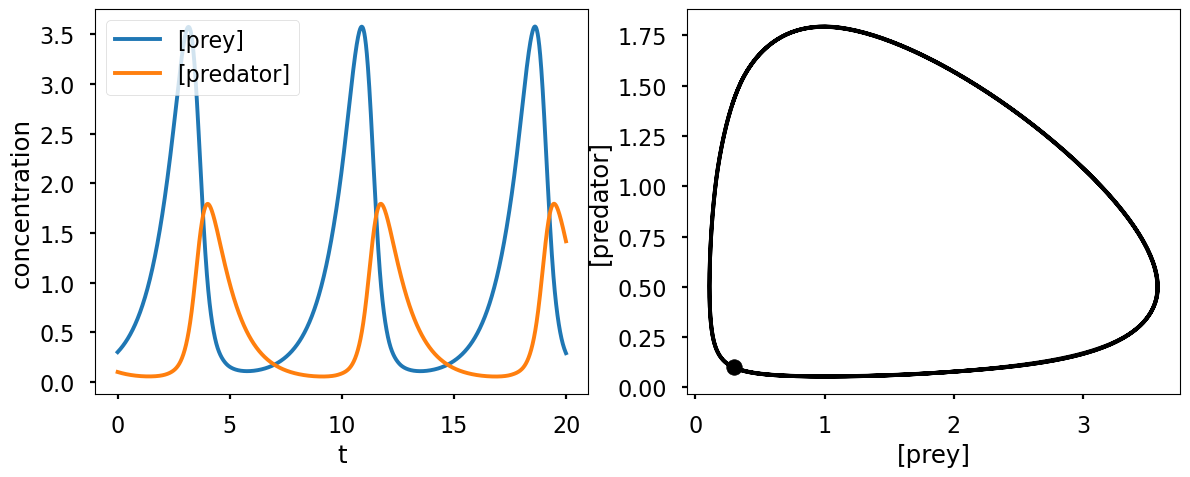

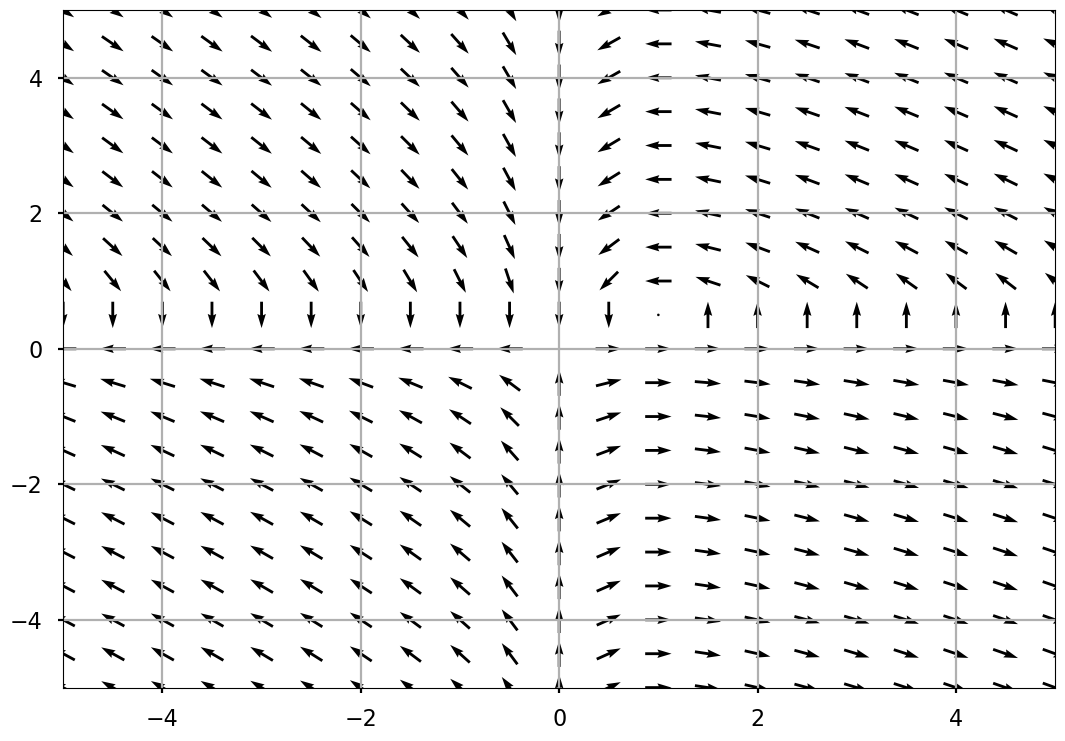

In [21]:
"""
EXAMPLE 6:
The predator-prey system: the Lodka-Volterra model: proposed in the 1920s
# https://en.wikipedia.org/wiki/Lotka–Volterra_equations 

#d[prey]/dt = [prey]*(k1-k2*[predator])
#d[predator]/dt = -[predator]*(k3-k4*[prey])
"""

#variables: t, time; s = {[mRNA], [protein]}
Lodka_Volterra = lambda t, s: [s[0]*(k1-k2*s[1]), -s[1]*(k3-k4*s[0])] 

k1=1 # parameter1
k2=2 # parameter2
k3=1 # parameter3
k4=1 # parameter4

t = np.arange(0, 20, 0.01) #time points
IC = [.3,.1] # Initial condition, value of ouur function, y(t) at t=0, y(t=0)
sol = solve_ivp(Lodka_Volterra, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODEs

plt.figure(figsize = (14,5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend(['[prey]', '[predator]'])

# phase plot
plt.subplot(122)
plt.scatter(sol.y[0][0], sol.y[1][0],color='k') # IC
plt.plot(sol.y[0], sol.y[1],'k')
plt.xlabel('[prey]')
plt.ylabel('[predator]')
# plt.legend(['[prey]', '[predator]'])
plt.show()

plt.figure()
Lodka_Volterra=["X*(1 - 2*Y)", "-Y*(1-1*X)"] # write the ODEs in X, Y
 # write the ODEs in X, Y
vector_field_XY(Lodka_Volterra, xran=[-5, 5], yran=[-5, 5])

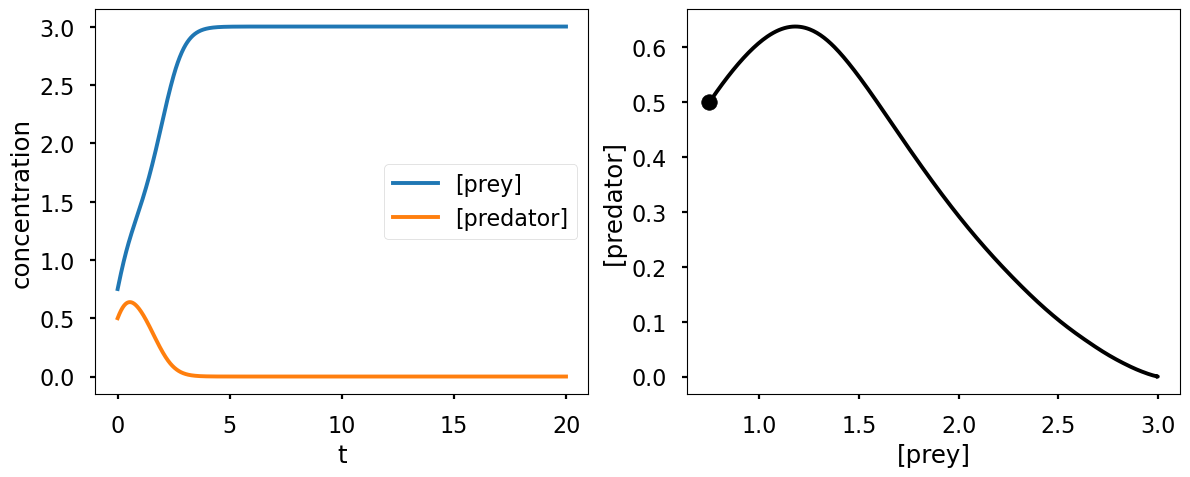

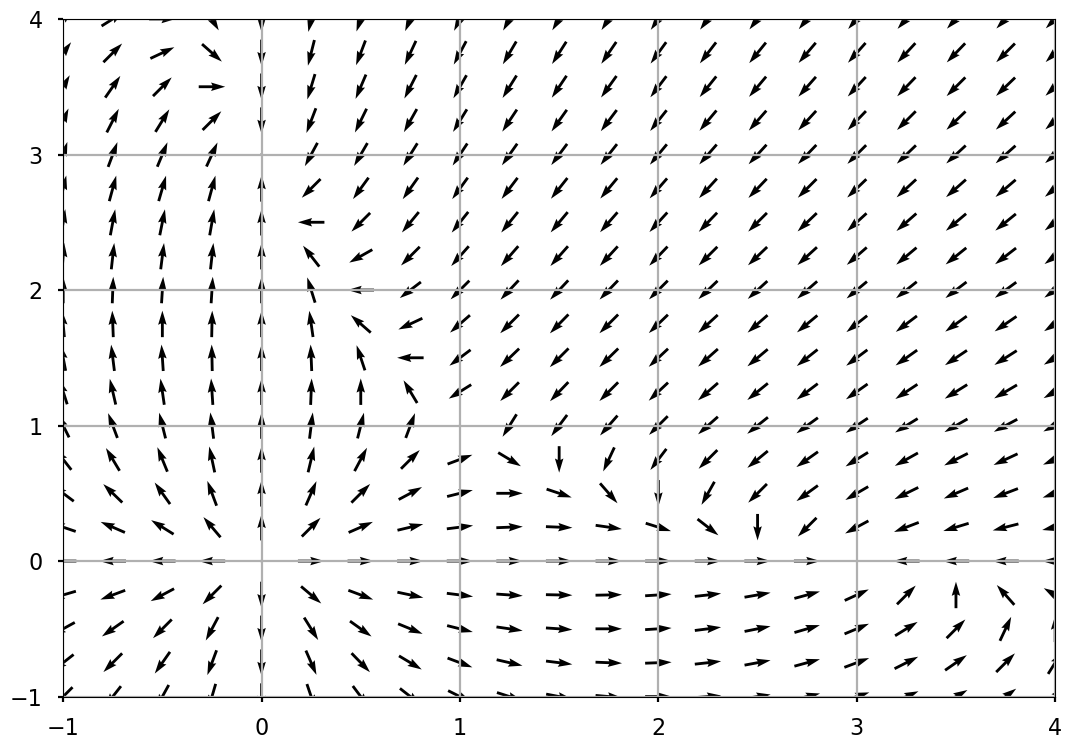

In [20]:
"""
EXAMPLE 7:
Population dynamics of competing species.

𝑑𝑥/𝑑𝑡=𝑥(3−𝑥−2𝑦)=3𝑥−𝑥^2−2𝑥𝑦=𝑓(𝑥,𝑦)
𝑑𝑦/𝑑𝑡=𝑦(3−2𝑥−𝑦)=3𝑦−𝑦^2−2𝑥𝑦=𝑔(𝑥,𝑦)
"""

#variables: t, time; s = {[mRNA], [protein]}
competing_species = lambda t, s: [s[0]*(k1+k2*s[0]+k3*s[1]), s[1]*(k4+k5*s[0]+k6*s[1])] 

k1=3 # parameter1
k2=-1 # parameter2
k3=-2 # parameter3
k4=3 # parameter4
k5=-2 # parameter5
k6=-1 # parameter6


t = np.arange(0, 20, 0.01) #time points
IC = [.75,.5] # Initial condition, value of ouur function, y(t) at t=0, y(t=0)
sol = solve_ivp(competing_species, [np.min(t),np.max(t)], IC, method = 'RK45', t_eval=t) # solve ODEs

plt.figure(figsize = (14,5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend(['[prey]', '[predator]'])

# phase plot
plt.subplot(122)
plt.scatter(sol.y[0][0], sol.y[1][0],color='k') # IC
plt.plot(sol.y[0], sol.y[1],'k')
plt.xlabel('[prey]')
plt.ylabel('[predator]')
# plt.legend(['[prey]', '[predator]'])
plt.show()

plt.figure()
competing_species=["X*(3-X-2*Y)", "Y*(3-2*X-Y)"] # write the ODEs in X, Y
 # write the ODEs in X, Y
vector_field_XY(competing_species, xran=[-1, 4], yran=[-1, 4])

In [21]:
"""
EXAMPLE 8:
polynomial functions of order n
exp(t)
sin(t)
cos(t)
"""
#variables: t, time; 
def poly_fxn(t,n): # t^n/n!
    return (1/np.math.factorial(n))*t**n
    
exp_fxn = lambda t: np.exp(t) 
sin_fxn = lambda t: np.sin(t) 
cos_fxn = lambda t: np.sin(t) 

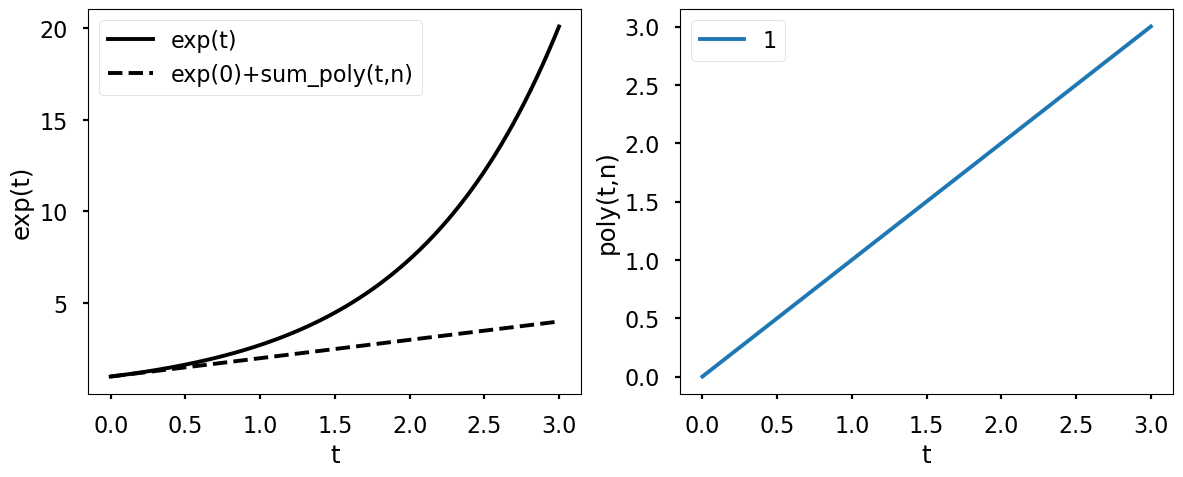

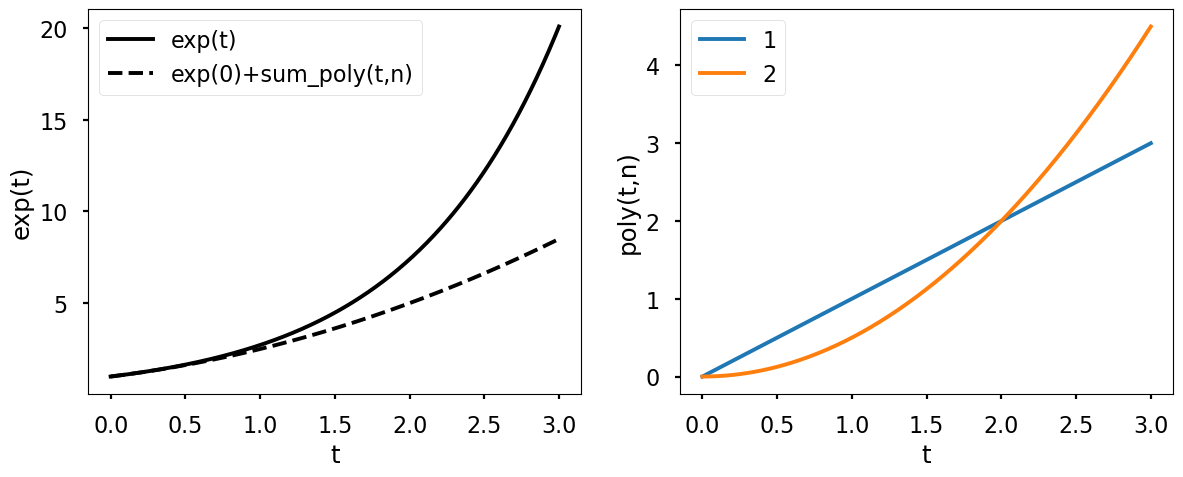

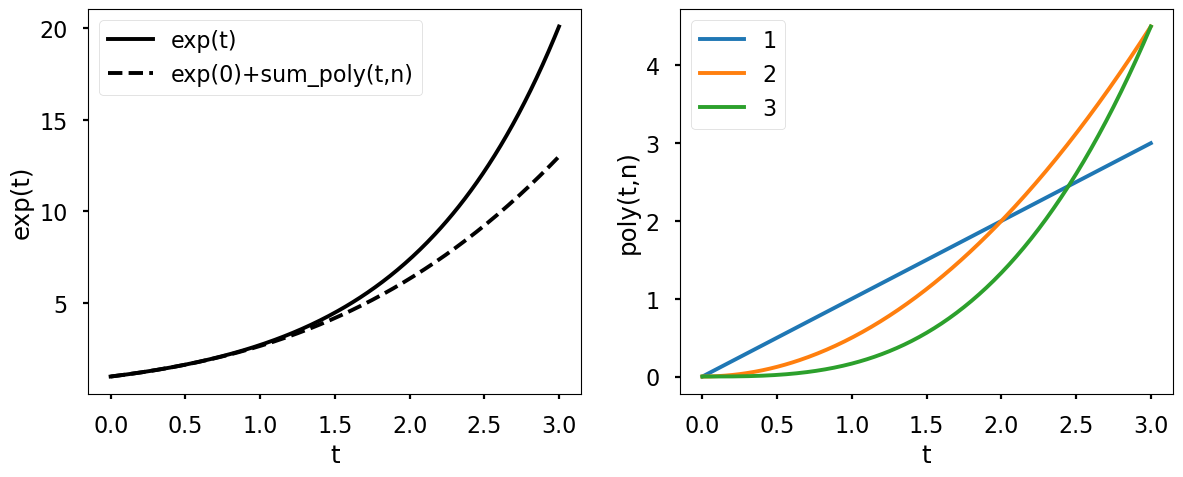

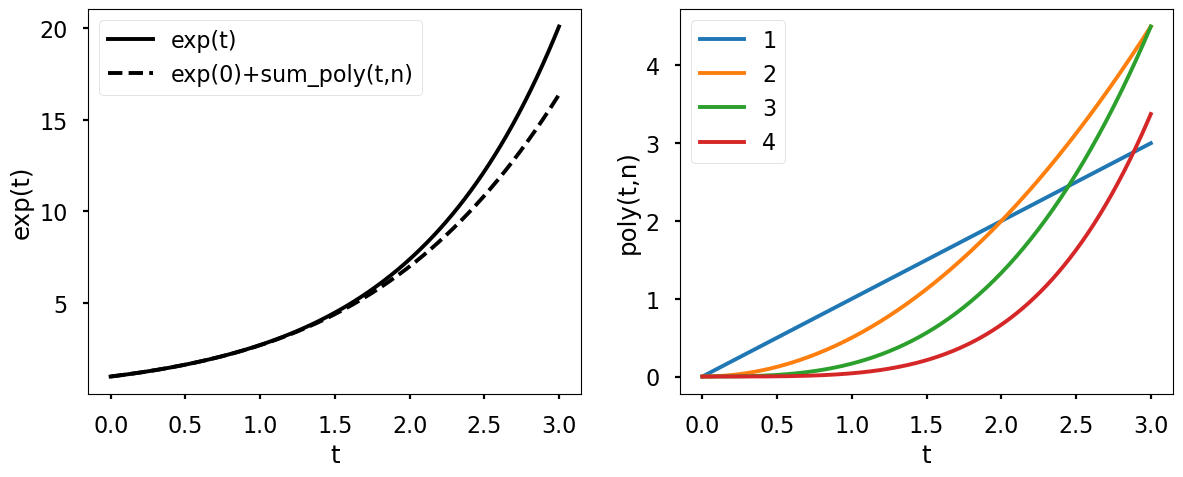

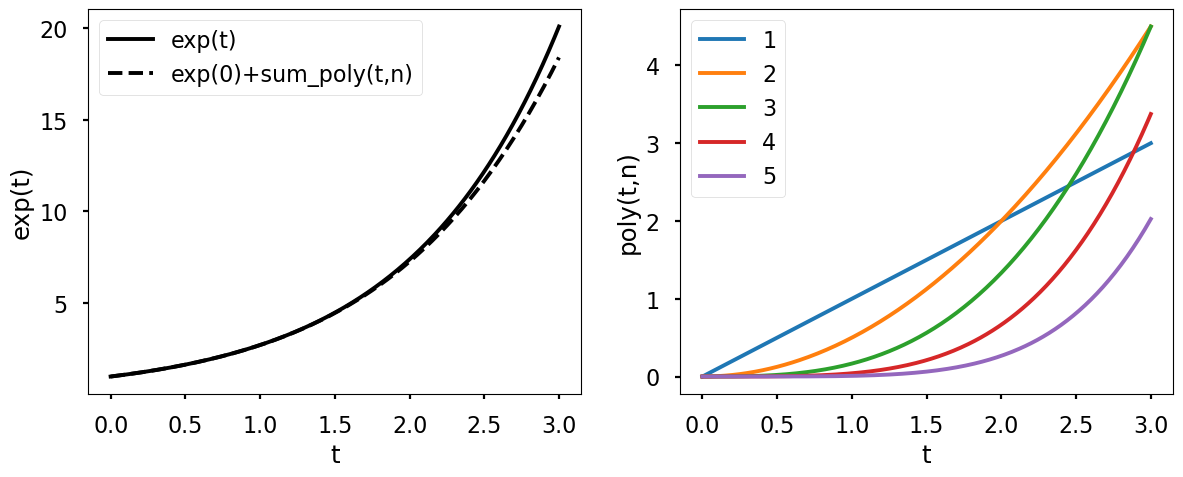

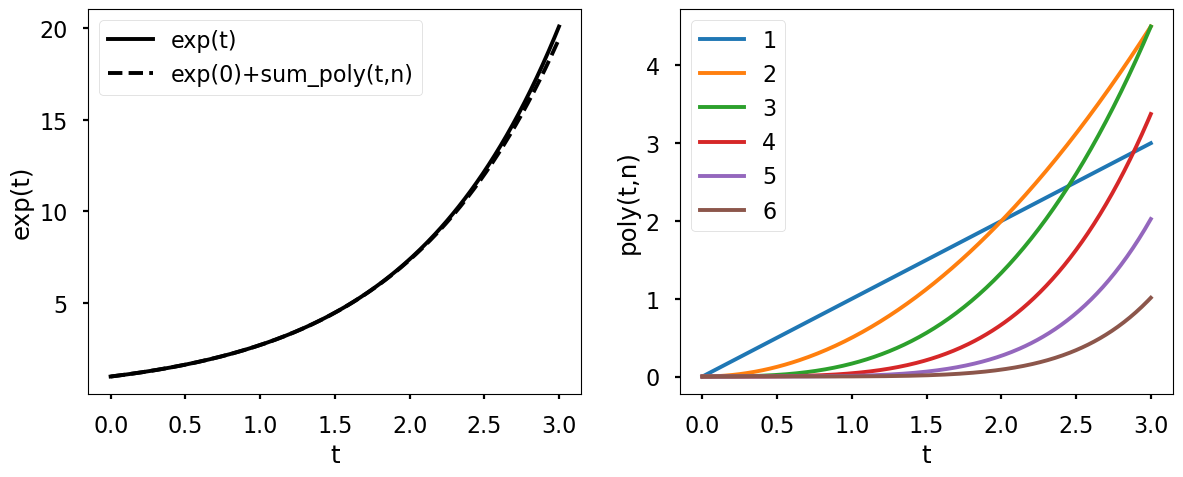

In [22]:
"""
EXAMPLE 8:
plot each
polynomial functions of order n
exp(t)
sin(t)
cos(t)
"""
t = np.arange(0, 3.01, 0.01) #time points

n_max_vals = [1,2,3,4,5,6]
for n_max in n_max_vals:
    polynomial_orders = np.arange(1, n_max_vals[n_max-1]+1, 1)
    plt.figure(figsize = (14,5))
    plt.subplot(122) # plot indv. poly(t,n) = t^n/n!
    yy = zeros(len(t),len(polynomial_orders))
    for i in polynomial_orders:
        y = poly_fxn(t,i)
        yy[:,i-1] = y
        plt.plot(t, y,label=i)
        plt.xlabel('t')
        plt.ylabel('poly(t,n)')
    plt.legend()
    sum_poly = np.sum(yy,axis=1)

    plt.subplot(121) # plot exp(t) and sum_n of poly(t,n)
    plt.plot(t, exp_fxn(t),'k')
    plt.plot(t, exp_fxn(0)+sum_poly,'--k')
    plt.xlabel('t')
    plt.ylabel('exp(t)')
    plt.legend(['exp(t)'])
    plt.legend(['exp(t)', 'exp(0)+sum_poly(t,n)'])

# for i in rang(len(t))
#     poly_1[i] = poly_fxn(t[i],1)